# Trisection Method

This is one of the simplest algorithms which can bracket the minimum of a unimodal function $f:[a,b]\to \Bbb{R}$. The main lines of the algorithm are given below:

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

**Initialization:** Initial segment $S_0 = [a,b]$, iteration number $i=1$
	
**Step** $i$: Given previous segment $S_{i-1}=[a_{i-1},b_{i-1}]$
 - choose points $x_i^{-},x_i^{+}$: 
  $$ x_i^- = \frac{2}{3}a_{i-1}+\frac{1}{3}b_{i-1} \quad 
    x_i^+ = \frac{1}{3}a_{i-1}+\frac{2}{3}b_{i-1}$$
 - compute $f(x_i^-)$ and $f(x_i^+)$
 - define the new segment as follows 
	- **if** $f(x_i^-)\leq f(x_i^+)$ then $S_i=[a_{i-1},x_i^+]$
	- **if** $f(x_i^-)\geq f(x_i^+)$ then $S_i=[x_i^-,b_{i-1}]$
 - go to step $i+1$
 </div>
 
 ### Some guiding questions:
 
 0) If you're not already familiar, make sure you know how a Jupyter Notebook works, how you can edit text and code and how you can run the codes.
 
 1) Make sure you understand the algorithm and why it is successful in bracketing the minimum. 
 
 2) What is the expected convergence rate? Given a starting interval $[a,b]$ and a given tolerance, which is the desired length of the final interval, how can you find the number of iterations needed?
 
 3) How many function evaluations are needed compared to iterations?

In [1]:
import numpy as np
import pylab as plt

a = -2.1      # initial lower bound
b = 2         # initial upper bound 
maxN = 10   # max number of function evaluations

nfeval = 0    # counter for function evaulations
variant = 1   # change the function


def f(x):
    global variant
    if variant==1:
        return (x+0.1)**2+0.2
    if variant==2:
        return -np.cos(x)
    if variant==3:
        return (x+0.1)**2+1
    if variant==4:
        return np.log(np.abs(x))

Tol = 1e-16  # desired tolerance

va = f(a)     # initial values for the function
vb = f(b)

if variant == 1:
    analytic = -0.1  # analytic solution (if it is known)
if variant == 2:
    analytic = 0
if variant == 3:
    analytic = -0.1
if variant == 4:
    analytic = 0

Below we define a function which applies the Trisection algorithm;

The inputs are: 
- a function
- a starting interval
- a requested tolerance. 

The outputs are:
- two lists of upper and lower bounds for the intervals
- two lists containing the intermediary points $x^-$ and $x^+$ defined in the algorithm

These outputs allow us to find the final precision of the approximation by computing the length of the last interval. They also allow us to visualize the optimization process.

In [2]:
def Trisection(fun,A,B,tol=1e-6,ubFeval=10):
    nfeval = 0
    lbhist = []
    ubhist = []
    x1hist = []
    x2hist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    while ub-lb>tol:
        x1 = 2/3*lb+1/3*ub
        x2 = 1/3*lb+2/3*ub
        v1 = fun(x1)
        nfeval = nfeval+1
        if nfeval>=ubFeval:
            break
        v2 = fun(x2)
        nfeval = nfeval+1
        if v1<=v2:
            ub=x2
        else:
            lb=x1
        x1hist.append(x1)
        x2hist.append(x2)
        lbhist.append(lb)
        ubhist.append(ub)
        if nfeval>=ubFeval:
            break
    return np.array(lbhist),np.array(ubhist),np.array(x1hist),np.array(x2hist),nfeval

Once the function which performs the algorithm is defined we can apply it to the cases which interest us. At the end of the optimization we print the information which is of interest and we plot the optimization process.

We minimize the function f on the interval [ -2.1 , 2 ]
Number of function evaluations:  10
Final precision (length of the final interval):  0.539917695473251
Final approximation:  -0.04156378600823046
Final absolute error (compared to analytic solution):  0.05843621399176954
Final relative error (compared to analytic solution):  0.5843621399176954


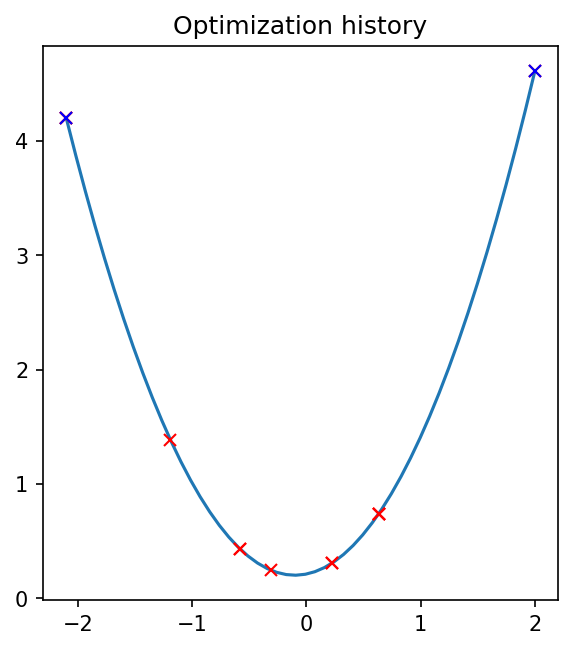

In [3]:
lbtab,ubtab,x1s,x2s,nfeval = Trisection(f,a,b,tol=Tol,ubFeval=maxN)

xstar = 0.5*(ubtab[-1]+lbtab[-1])    # approximation of the optimum with the midpoint of the final interval
print("We minimize the function f on the interval [",a,",",b,"]")
print("Number of function evaluations: ",nfeval)
print("Final precision (length of the final interval): ",ubtab[-1]-lbtab[-1])  # length of the final interval
print("Final approximation: ",xstar)
print("Final absolute error (compared to analytic solution): ",abs(xstar-analytic))
print("Final relative error (compared to analytic solution): ",abs(xstar-analytic)/abs(analytic))

# some plotting
plt.figure(1,dpi=150)

xs=np.linspace(a,b)
plt.plot(xs,f(xs))  # plot the function
plt.ylim(bottom=-0.1)
plt.xlim([a,b])
plt.plot(lbtab,f(np.array(lbtab)),'rx')   # plot the values at the intermediary points
plt.plot(ubtab,f(np.array(ubtab)),'rx')
plt.plot(a,va,'bx')
plt.plot(b,vb,'bx')
plt.title('Optimization history')
plt.axis('scaled')
plt.show()

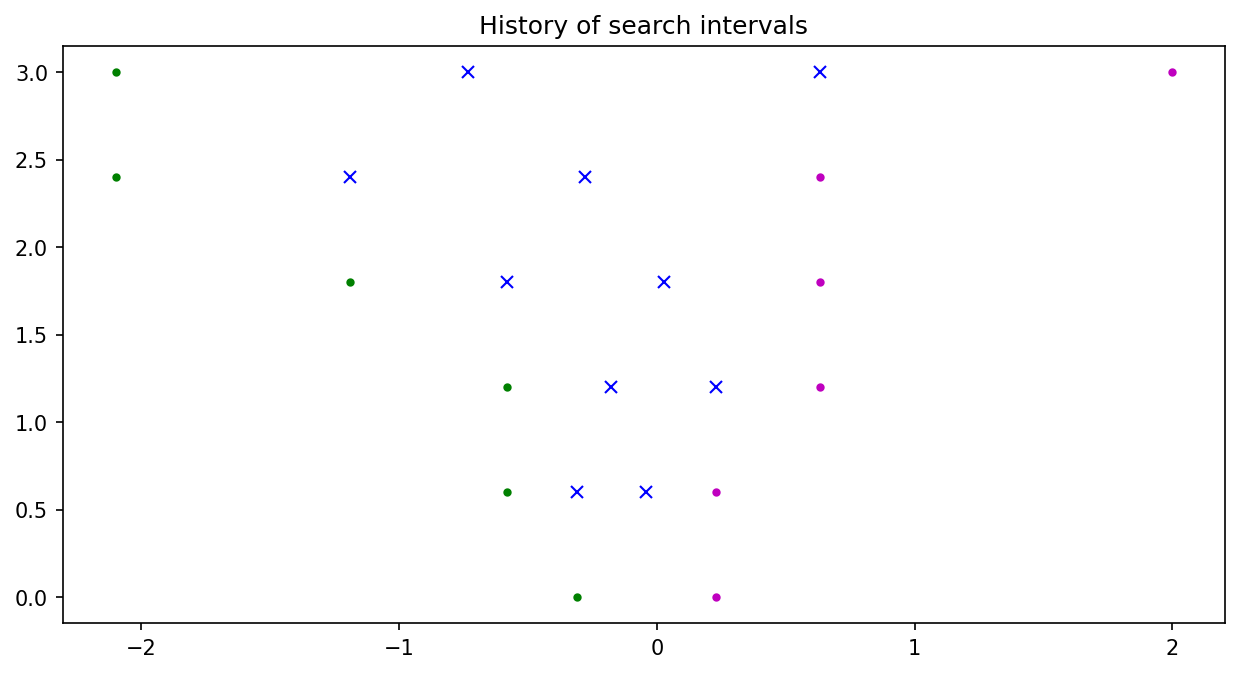

In [4]:
# here we generate a plot of all intermediary points to see their relative position

plt.figure(dpi=150,figsize=(10,5))
h = np.linspace(3,0,lbtab.size)

plt.plot(lbtab,h,'g.')
plt.plot(ubtab,h,'m.')
plt.plot(x1s,h[0:-1],'bx')
plt.plot(x2s,h[0:-1],'bx')
plt.title('History of search intervals')
#plt.axis('scaled')
plt.show()

# Error analysis
Finally, we may study the convergence of the errors. For simplicity, we can choose as a measure of the error the length $r_i|b_i-a_i|$ of the search interval at iteration $i$. In order to see the orders of convergence we usually plot the next errors $r_{i+1}$ in terms of the previous ones $r_i$ on a log-log scale. 



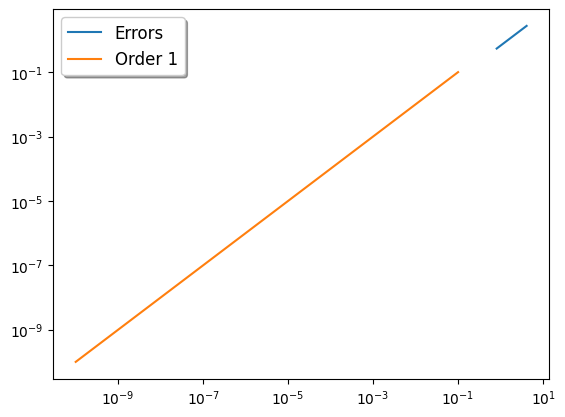

In [5]:
# Error analysis

errors = ubtab-lbtab


plt.figure()

# plot next errors in term of current ones!
plt.loglog(errors[:-1:],errors[1:],label='Errors') 
sq  = 0.1**np.linspace(1,10,10)                    # Construct curve of order 1
plt.loglog(sq,sq,label='Order 1')                  # Plot order curves for comparison

plt.legend(loc='best', shadow=True, fontsize='large')  # Show legend
plt.show()